# GPU Price Forcaster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


### Load datasets

[Custom dataset](https://www.tomshardware.com/news/gpu-pricing-index)


In [ ]:
# Loading the GPU benchmarks dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/archive.zip (Unzipped Files)/GPU_benchmarks_v7.csv')
date_time = pd.to_datetime(data.pop('testDate'), format='%Y')
data.head()


,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,Desktop


In [ ]:
# Loading the Custom GPU prices dataset
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book1.xlsx')
df1.head()


,GPU,Jan 23 Retail Price,Jan 23 eBay Price,Jan 23 QTY Sold,Dec 22 eBay Price,Jan 23 Monthly Change,Jan 23 FPS/$,Dec 22 QTY Sold,Nov 22 eBay Price,Dec 22 Monthly Change,...,May 22 FPS/$,March 22 eBay Price,April 22 QTY Sold,April 22 FPS/$,Feb 22 eBay Price,March 22 QTY Sold,March 22 FPS/$,Jan 22 eBay Price,Feb 22 QTY Sold,Feb 22 FPS/$
0,GeForce RTX 4090,"$1,599","$2,062",563,"$2,194",-0.061,0.0717,655.0,"$2,216",-0.01,...,0.0569,"$2,724",11.0,0.0481,"$2,341",968.0,0.0652,"$2,609",1353.0,0.0585
1,GeForce RTX 4080,"$1,200","$1,253",128,"$1,374",-0.088,0.1128,176.0,"$1,503",-0.086,...,0.0715,"$2,111",983.0,0.0600,"$1,721",753.0,0.0868,"$1,874",871.0,0.0797
2,GeForce RTX 4070 Ti,$820,$910,39,-,—,0.143,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GeForce RTX 3090 Ti,"$1,633","$1,097",185,"$1,182",-0.072,0.1199,180.0,"$1,218",-0.029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GeForce RTX 3090,"$1,300",$817,1188,$867,-0.057,0.1568,1273.0,$871,-0.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GPU Prices Trend

In [ ]:
# Preprocess data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book4.xlsx', usecols=range(0, 23), index_col=0)
#df.head()
gpu_price = df.transpose()
#gpu_price = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book3.xlsx', index_col=0)
gpu_price.head()


GPU,GeForce RTX 4090,GeForce RTX 4080,GeForce RTX 4070 Ti,GeForce RTX 3090 Ti,GeForce RTX 3090,GeForce RTX 3080 Ti,GeForce RTX 3080 12GB,GeForce RTX 3080,GeForce RTX 3070 Ti,GeForce RTX 3070,...,GeForce GTX 1660 Ti,GeForce GTX 1660 Super,GeForce GTX 1660,GeForce GTX 1650 Super,GeForce GTX 1650,Radeon RX 5700 XT,Radeon RX 5700,Radeon RX 5600 XT,Radeon RX 5500 XT 8GB,Radeon RX 5500 XT 4GB
2021-03-01,3016.0,NaN,NaN,NaN,NaN,NaN,NaN,2177.0,NaN,1357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,3025.0,NaN,NaN,NaN,NaN,NaN,NaN,2199.0,NaN,1391.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-01,3140.0,NaN,NaN,NaN,NaN,NaN,NaN,2235.0,NaN,1421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,3002.0,2307.0,NaN,NaN,NaN,NaN,NaN,1978.0,1407.0,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,2483.0,1886.0,NaN,NaN,NaN,NaN,NaN,1636.0,1096.0,1063.0,...,425.0,455.0,370.0,334.0,288.0,829.0,698.0,523.0,393.0,321.0


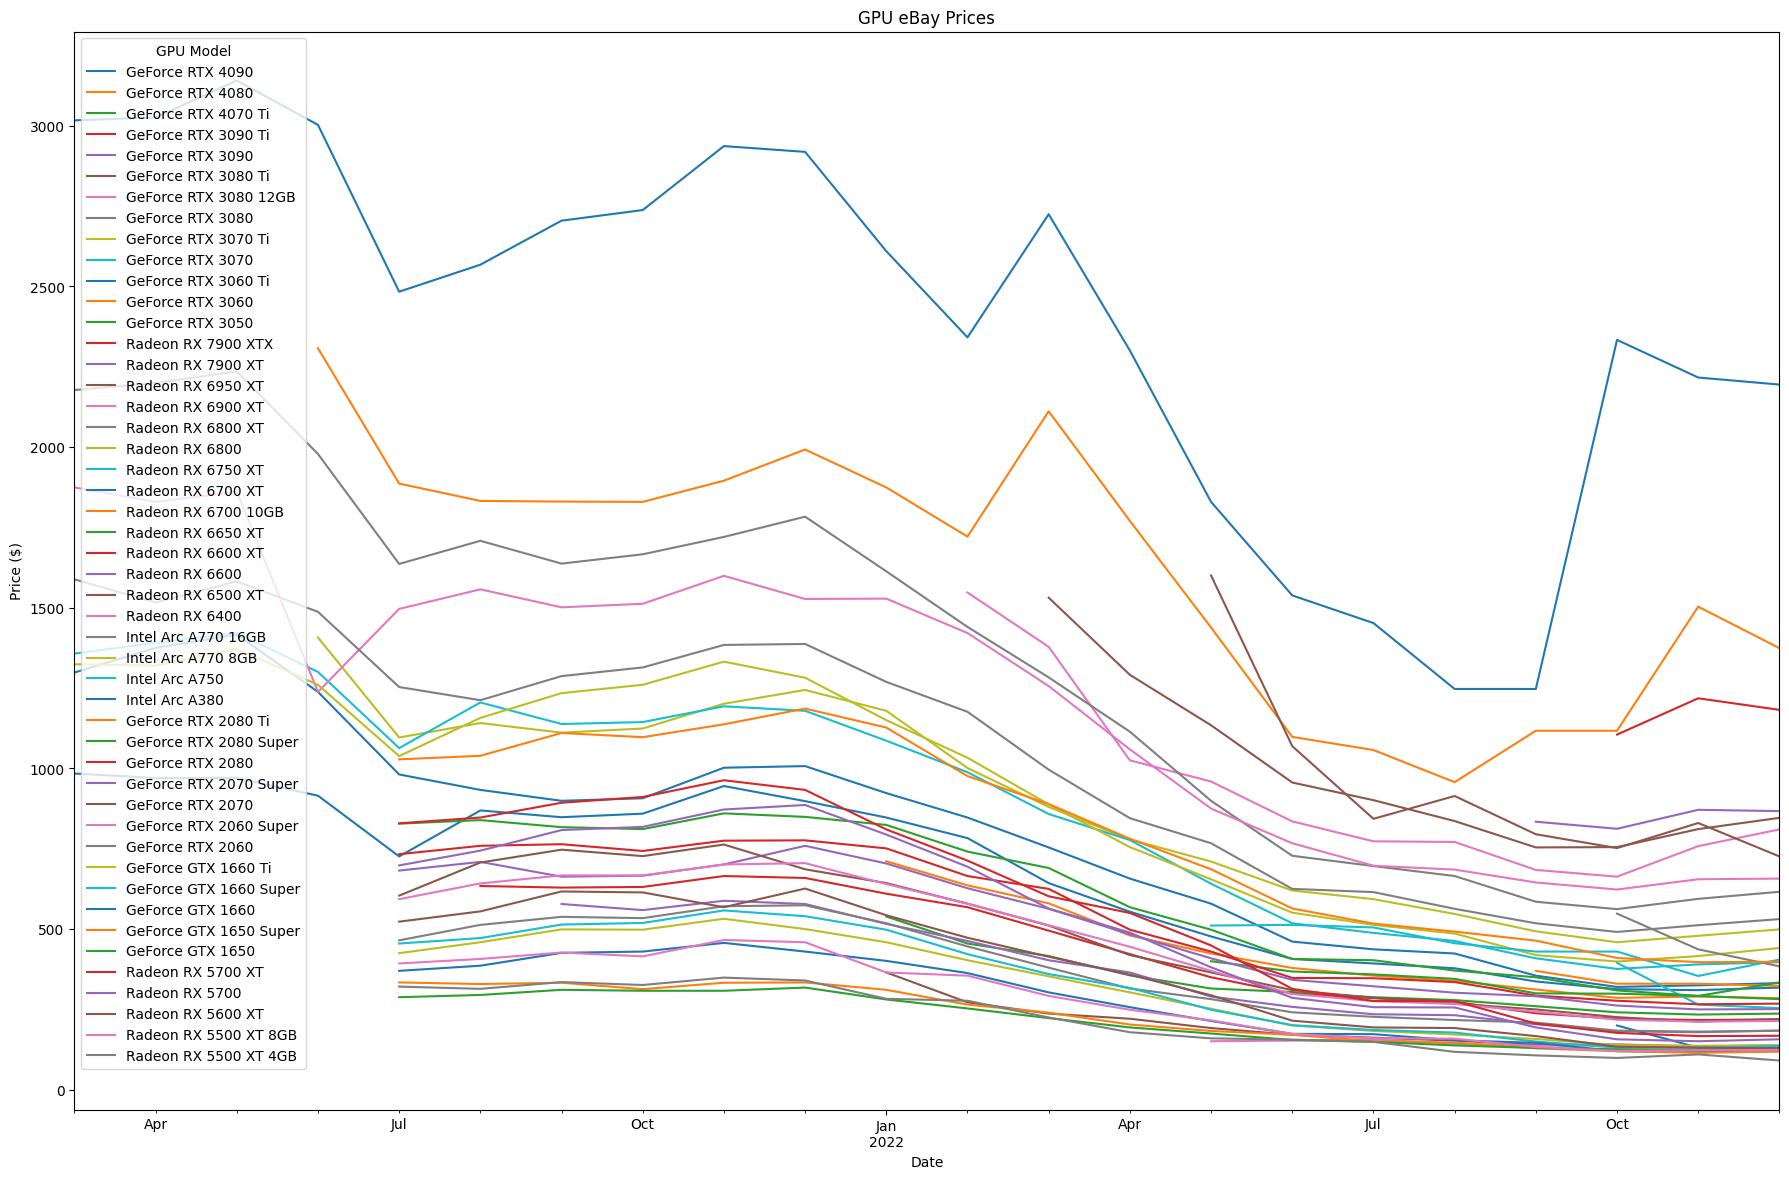

In [ ]:
# Plot the GPU prices over time
gpu_price.plot(kind='line', figsize=(22, 14))

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('GPU eBay Prices')
plt.legend(title='GPU Model', loc='upper left')
plt.show()


In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
gpu_price = scaler.fit_transform(gpu_price)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# Convert Training Data to Right Shape
features_set = []
labels = []
for i in range(2, 12):
    features_set.append(gpu_price[i-2:i, 0])
    labels.append(gpu_price[i, 0])

features_set, labels = np.array(features_set), np.array(labels)

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape


(10, 2, 1)

In [ ]:
# Training The LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
history = model.fit(features_set, labels, epochs = 100, batch_size = 10)


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.6411
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6402
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6393
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6382
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6373
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6360
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6351
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6343
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6326
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6314
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6304
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6282
Epoch 13/100
1/1 [==============================] -

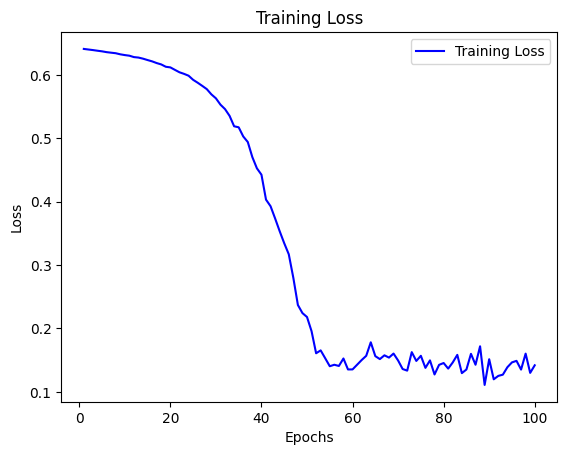

In [ ]:
# Extract loss values
loss = history.history['loss']

# Plot loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Testing
test_inputs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book2.xlsx', usecols=range(12, 14), index_col=0).transpose()
#test_inputs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book3.xlsx', index_col=0)
test_inputs = test_inputs.values
test_inputs.shape


(1, 48)

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.fit_transform(test_inputs)


In [ ]:
test_features = []
for i in range(2, 4):
    test_features.append(test_inputs[i-2:i, 0])


In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape


(2, 2, 1)

In [ ]:
predictions = model.predict(test_features)


1/1 [==============================] - 1s 1s/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
predictions


array([[1340.9694, 1338.9767, 1329.2119, 1320.131 , 1330.762 , 1335.7366,
        1322.4819, 1319.1268, 1349.9487, 1339.4503, 1348.4281, 1338.8782,
        1331.0933, 1339.0802, 1343.3677, 1336.8472, 1335.7996, 1341.688 ,
        1329.5673, 1342.1713, 1327.2198, 1339.5339, 1338.5948, 1330.359 ,
        1331.5854, 1330.8157, 1339.2843, 1325.1787, 1329.5226, 1337.956 ,
        1342.6517, 1309.2224, 1328.0272, 1344.6648, 1326.8704, 1330.4861,
        1324.8239, 1339.3776, 1338.4186, 1338.3486, 1337.1708, 1324.5927,
        1330.4398, 1344.0665, 1340.9585, 1346.9894, 1322.8187, 1331.0735,
        1356.2195, 1339.0859],
       [1225.252 , 1224.155 , 1211.1991, 1212.362 , 1214.7839, 1215.3127,
        1205.3253, 1208.6583, 1221.2827, 1217.7655, 1225.747 , 1213.473 ,
        1216.9105, 1221.2457, 1220.2333, 1220.0325, 1210.4478, 1220.445 ,
        1217.4171, 1231.8612, 1225.4397, 1229.6577, 1217.421 , 1209.6931,
        1215.4534, 1213.0797, 1220.9534, 1211.8279, 1216.2561, 1219.8602,
       

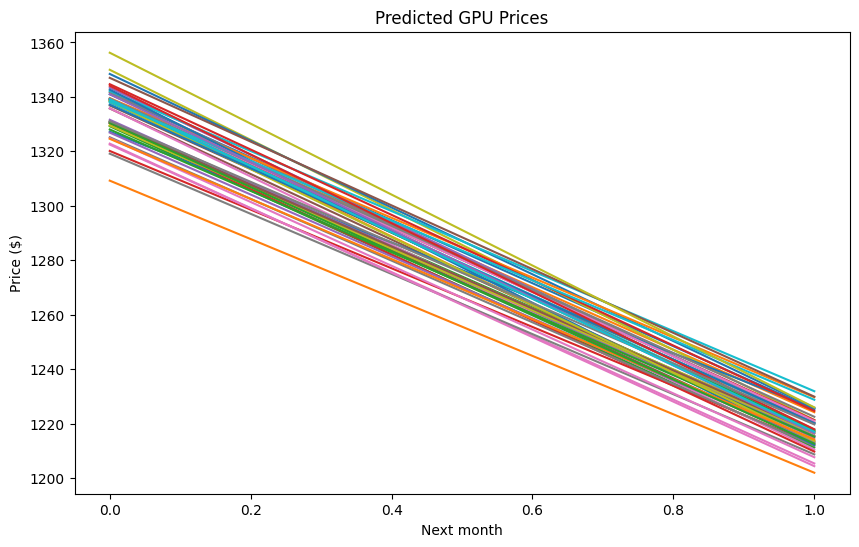

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(predictions)
plt.xlabel('Next month')
plt.ylabel('Price ($)')
plt.title('Predicted GPU Prices')
plt.show()


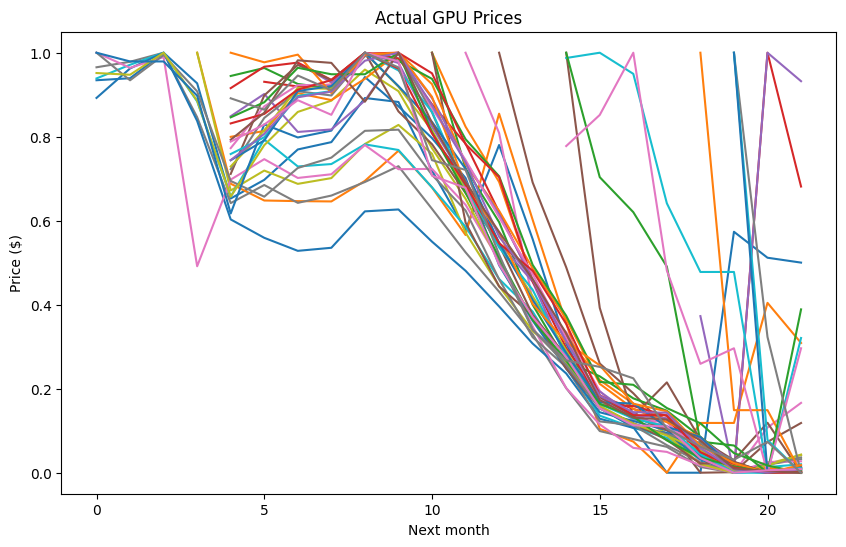

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(gpu_price)
plt.xlabel('Next month')
plt.ylabel('Price ($)')
plt.title('Actual GPU Prices')
plt.show()


### Time Series Forecasting

In [ ]:
dff = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/GPU Price Forcasting/Book3.xlsx')
dff['Date'] = pd.to_datetime(dff['Date'], format="%Y%m%d")
dff = dff.set_index('Date')
dff.tail()


,GeForce RTX 4090,GeForce RTX 4080,GeForce RTX 4070 Ti,GeForce RTX 3090 Ti,GeForce RTX 3090,GeForce RTX 3080 Ti,GeForce RTX 3080 12GB,GeForce RTX 3080,GeForce RTX 3070 Ti,GeForce RTX 3070,...,GeForce GTX 1660 Ti,GeForce GTX 1660 Super,GeForce GTX 1660,GeForce GTX 1650 Super,GeForce GTX 1650,Radeon RX 5700 XT,Radeon RX 5700,Radeon RX 5600 XT,Radeon RX 5500 XT 8GB,Radeon RX 5500 XT 4GB
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,1247,1117.0,NaN,NaN,834.0,754.0,684.0,585,493.0,409,...,158.0,150.0,146.0,129.0,130.0,206.0,194.0,167.0,133.0,107.0
2022-10-01,2333,1117.0,NaN,1105.0,812.0,755.0,663.0,562,459.0,376,...,139.0,131.0,120.0,120.0,126.0,177.0,157.0,134.0,121.0,99.0
2022-11-01,2216,1503.0,NaN,1218.0,871.0,811.0,758.0,594,479.0,390,...,137.0,131.0,117.0,115.0,123.0,167.0,151.0,131.0,123.0,110.0
2022-12-01,2194,1374.0,NaN,1182.0,867.0,846.0,810.0,616,499.0,397,...,139.0,136.0,120.0,119.0,124.0,168.0,157.0,129.0,124.0,91.0
2023-01-01,2062,1253.0,910.0,1097.0,817.0,768.0,748.0,588,483.0,397,...,140.0,132.0,116.0,110.0,122.0,165.0,169.0,129.0,105.0,90.0


In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
dff_scaled = scaler.fit_transform(dff)


In [ ]:
# Convert Training Data to Right Shape
forecast_features_set = []
labels = []
for i in range(2, 13):
    forecast_features_set.append(dff_scaled[i-2:i, 0])
    labels.append(dff_scaled[i, 0])

forecast_features_set , labels = np.array(forecast_features_set ), np.array(labels)

forecast_features_set = np.reshape(forecast_features_set, (forecast_features_set.shape[0], forecast_features_set.shape[1], 1))
forecast_features_set.shape


(11, 2, 1)

In [ ]:
# Training The LSTM
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(forecast_features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(forecast_features_set, labels, epochs = 20, batch_size = 10)


Epoch 1/20
2/2 [==============================] - 8s 16ms/step - loss: 0.6376
Epoch 2/20
2/2 [==============================] - 0s 10ms/step - loss: 0.6199
Epoch 3/20
2/2 [==============================] - 0s 12ms/step - loss: 0.6020
Epoch 4/20
2/2 [==============================] - 0s 9ms/step - loss: 0.5827
Epoch 5/20
2/2 [==============================] - 0s 10ms/step - loss: 0.5650
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 0.5405
Epoch 7/20
2/2 [==============================] - 0s 11ms/step - loss: 0.5145
Epoch 8/20
2/2 [==============================] - 0s 10ms/step - loss: 0.4805
Epoch 9/20
2/2 [==============================] - 0s 9ms/step - loss: 0.4541
Epoch 10/20
2/2 [==============================] - 0s 11ms/step - loss: 0.4216
Epoch 11/20
2/2 [==============================] - 0s 15ms/step - loss: 0.3725
Epoch 12/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3314
Epoch 13/20
2/2 [==============================] - 0s 9ms/step -